<a href="https://colab.research.google.com/github/Coderbarkha/Calculator-Project/blob/main/SalaryvsYearsofexperience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


In [5]:
# Load the data
data = pd.read_csv('/content/drive/MyDrive/Salary_dataset.csv')


In [6]:
print("Missing values:\n", data.isnull().sum())

Missing values:
 Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64


In [8]:
# Calculate the average of 'Salary' and 'YearsExperience', ignoring NaN values
average_salary = data['Salary'].mean()
average_years_experience= data['YearsExperience'].mean()


In [9]:
# Fill NaN values with the calculated averages
data['Salary'].fillna(average_salary, inplace=True)
data['YearsExperience'].fillna(average_years_experience, inplace=True)


<ipython-input-9-5b23f3c1fd62>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Salary'].fillna(average_salary, inplace=True)
<ipython-input-9-5b23f3c1fd62>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [11]:
# Verify that there are no more missing values in the specified columns
print("\nMissing values after filling:\n", data[['Salary', 'YearsExperience']].isnull().sum())




Missing values after filling:
 Salary             0
YearsExperience    0
dtype: int64


In [12]:
# Split the data into training (80%) and testing (20%) sets
X = data[['YearsExperience']]  # Independent variable
y = data['Salary']            # Dependent variable


In [13]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Print the 80% training and 20% testing data
print("\nTraining Data (80%):")
print(pd.concat([X_train, y_train], axis=1).head())
print("\nTesting Data (20%):")
print(pd.concat([X_test, y_test], axis=1).head())



Training Data (80%):
    YearsExperience    Salary
28             10.4  122392.0
24              8.8  109432.0
12              4.1   56958.0
0               1.2   39344.0
4               2.3   39892.0

Testing Data (20%):
    YearsExperience    Salary
27              9.7  112636.0
15              5.0   67939.0
23              8.3  113813.0
17              5.4   83089.0
8               3.3   64446.0


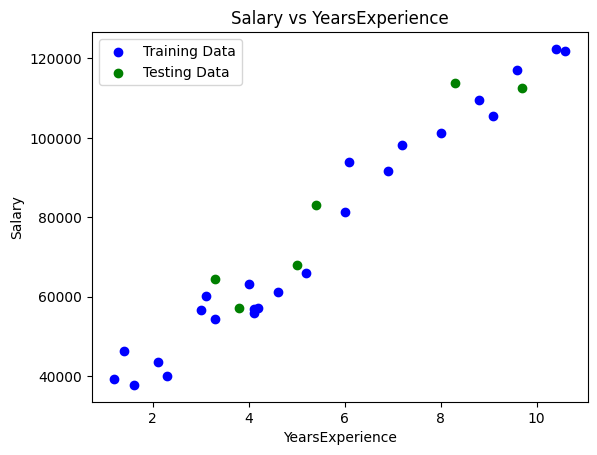

In [15]:
# Plot the training and testing data
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Testing Data')
plt.title('Salary vs YearsExperience')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend()
plt.show()


In [16]:
# Simple Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [17]:
# Print the model coefficients
print(f"\nSlope: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")




Slope: 9423.815323030976
Intercept: 24380.201479473704


In [18]:
# Predictions for training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


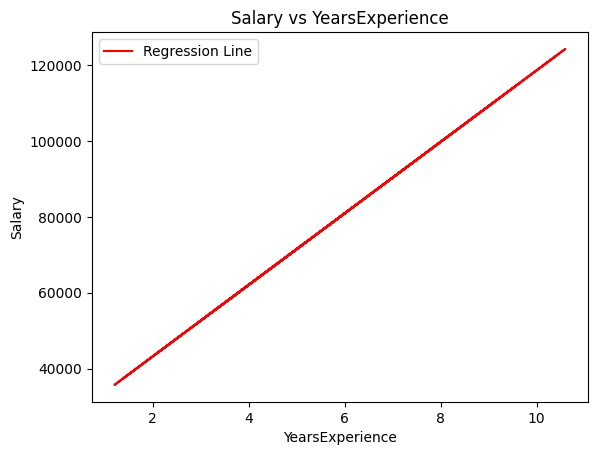

In [19]:
# Plot the regression line
plt.plot(X_train, y_train_pred, color='red', label='Regression Line')
plt.title('Salary vs YearsExperience')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend()
plt.show()


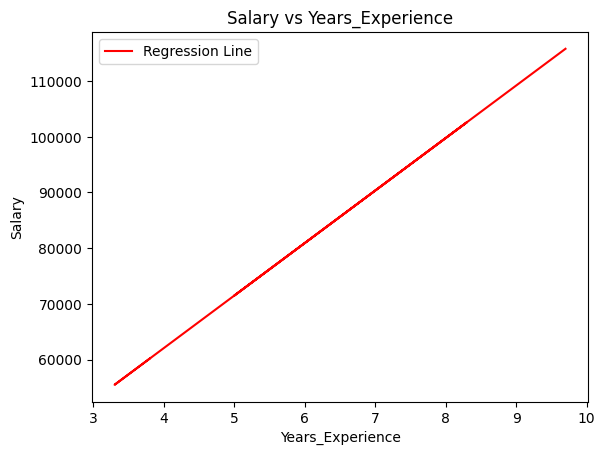

In [20]:
# Plot the regression line
plt.plot(X_test, y_test_pred, color='red', label='Regression Line')
plt.title('Salary vs Years_Experience')
plt.xlabel('Years_Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()


In [22]:
# Calculate mean, deviations, and predicted values for training data
train_data = pd.concat([X_train, y_train], axis=1)
train_data['Predicted_Salary'] = y_train_pred
train_data['Deviation'] = train_data['Salary'] - train_data['Predicted_Salary']


In [23]:
# Calculate mean, deviations, and predicted values for testing data
test_data = pd.concat([X_test, y_test], axis=1)
test_data['Predicted_Salary'] = y_test_pred
test_data['Deviation'] = test_data['Salary'] - test_data['Predicted_Salary']


In [24]:
# Print training data calculations
print("\nTraining Data Calculations:")
print(train_data[['YearsExperience', 'Salary', 'Predicted_Salary', 'Deviation']].head())
print(f"\nMean of Salary (Training): {train_data['Salary'].mean()}")
print(f"Mean of Predicted_Salary (Training): {train_data['Predicted_Salary'].mean()}")
print(f"Mean Deviation (Training): {train_data['Deviation'].mean()}")



Training Data Calculations:
    YearsExperience    Salary  Predicted_Salary    Deviation
28             10.4  122392.0     122387.880839     4.119161
24              8.8  109432.0     107309.776322  2122.223678
12              4.1   56958.0      63017.844304 -6059.844304
0               1.2   39344.0      35688.779867  3655.220133
4               2.3   39892.0      46054.976722 -6162.976722

Mean of Salary (Training): 74208.625
Mean of Predicted_Salary (Training): 74208.62499999999
Mean Deviation (Training): 1.0610771520684162e-11


In [25]:
# Print testing data calculations
print("\nTesting Data Calculations:")
print(test_data[['YearsExperience', 'Salary', 'Predicted_Salary', 'Deviation']].head())
print(f"\nMean of Salary (Testing): {test_data['Salary'].mean()}")
print(f"Mean of Predicted_Salary (Testing): {test_data['Predicted_Salary'].mean()}")
print(f"Mean Deviation (Testing): {test_data['Deviation'].mean()}")




Testing Data Calculations:
    YearsExperience    Salary  Predicted_Salary     Deviation
27              9.7  112636.0     115791.210113  -3155.210113
15              5.0   67939.0      71499.278095  -3560.278095
23              8.3  113813.0     102597.868661  11215.131339
17              5.4   83089.0      75268.804224   7820.195776
8               3.3   64446.0      55478.792045   8967.207955

Mean of Salary (Testing): 83185.5
Mean of Predicted_Salary (Testing): 80137.77547407364
Mean Deviation (Testing): 3047.7245259263545


In [26]:
# Print the R-squared value

print(f"R-squared (Training): {r2_score(y_train, y_train_pred)}")
print(f"R-squared (Testing): {r2_score(y_test, y_test_pred)}")


R-squared (Training): 0.9645401573418148
R-squared (Testing): 0.9024461774180497
